# Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from common.fig_utils import *
cli1_fn='fundus_clinician_results_1.csv'
cli2_fn='fundus_clinician_results_2.csv'
cli3_fn='fundus_clinician_results_3.csv'
cli4_fn='fundus_clinician_results_4.csv'
cli5_fn='fundus_clinician_results_5.csv'
results_fn='results_clinical_set.csv'

bm_te='bm_te_base1_results.csv'

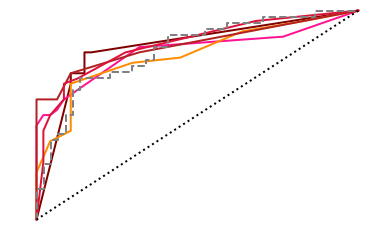

In [4]:
%precision %.2f
#cli_tests
import seaborn as sns
res=pd.read_table(results_fn)
sns.set_style('white')
sns.despine(offset=10,trim=True)
#cl1
cl1=pd.read_table(cli1_fn)
cl1_clip=pd.merge(cl1,res,how='inner',on=['label','pid'])
cl1_label=cl1_clip['label']
cl1_ypred=cl1_clip['p_ext']

#cl2
cl2=pd.read_table(cli2_fn)
cl2_clip=pd.merge(cl2,res,how='inner',on=['label','pid'])
cl2_label=cl2_clip['label']
cl2_ypred=cl2_clip['p_ext']

#cli3
cli3=pd.read_table(cli31_fn)
cli3_clip=pd.merge(cli3,res,how='inner',on=['label','pid'])
cli3_label=cli3_clip['label']
cli3_ypred=cli3_clip['p_ext']

#cli4
cli4=pd.read_table(cli4_fn)
cli4_clip=pd.merge(cli4,res,how='inner',on=['label','pid'])
cli4_label=cli4_clip['label']
cli4_ypred=cli4_clip['p_ext']

#cli5
cli5=pd.read_table(cli5_fn)
cli5_clip=pd.merge(cli5,res,how='inner',on=['label','pid'])
cli5_label=cli5_clip['label']
cli5_ypred=cli5_clip['p_ext']



cli3_fpr, cli3_tpr, _ = roc_curve(cli3_label,cli3_ypred)
cli3_roc_auc = auc(cli3_fpr, cli3_tpr)

cl1_fpr, cl1_tpr, _ = roc_curve(cl1_label,cl1_ypred)
cl1_roc_auc = auc(cl1_fpr, cl1_tpr)

cl2_fpr, cl2_tpr, _ = roc_curve(cl2_label,cl2_ypred)
cl2_roc_auc = auc(cl2_fpr, cl2_tpr)

cli4_fpr, cli4_tpr, _ = roc_curve(cli4_label,cli4_ypred)
cli4_roc_auc = auc(cli4_fpr, cli4_tpr)

cli5_fpr, cli5_tpr, _ = roc_curve(cli5_label,cli5_ypred)
cli5_roc_auc = auc(cli5_fpr, cli5_tpr)

#ML models
test_df=pd.read_table(cli_test_fundus)
z=test_df['fn'].str.split('/',expand=True)
test_df['fn']=z[5]
test_df.columns=[0,1,'label','fn','p']
test_df_clip=pd.merge(test_df,res,how='inner',on=['fn','label'])

f_label=test_df[['label']].values
f_ypred=test_df[[1]].values

f_fpr, f_tpr, _ = roc_curve(f_label,f_ypred)
f_roc_auc = auc(f_fpr, f_tpr)

bm_df=pd.read_table(bm_te)
bm_fpr, bm_tpr, _ = roc_curve(bm_df[['label']].values,bm_df[['pred']].values)
bm_roc_auc = auc(bm_fpr, bm_tpr)



lw = 2

te_data1=pd.read_table(bm_te)

fpr, tpr, _ = roc_curve(te_data1['l'].values,te_data1['pred'].values)
roc_auc = auc(fpr, tpr)
lw = 2


pl.plot(cl1_fpr, cl1_tpr, color='maroon',linestyle='-',
         lw=lw, label='Clinician 1 (area = %0.2f)' % cl1_roc_auc)


pl.plot(cl2_fpr, cl2_tpr, color='deeppink',linestyle='-',
         lw=lw, label='Clinician 2 (area = %0.2f)' % cl2_roc_auc)

pl.plot(cli3_fpr, cli3_tpr, color='darkorange',linestyle='-',
         lw=lw, label='Clinician 3 (area = %0.2f)' % cli3_roc_auc)

pl.plot(cli4_fpr, cli4_tpr, color='firebrick',linestyle='-',
         lw=lw, label='Clinician 4 (area = %0.2f)' % cli4_roc_auc)
pl.plot(cli5_fpr, cli5_tpr, color='crimson',linestyle='-',
         lw=lw, label='Clinician 5 (area = %0.2f)' % cli5_roc_auc)

pl.plot(fpr, tpr, color='grey',linestyle='--',
         lw=lw, label='base model 1(area = %0.2f)' % roc_auc)


pl.plot([0, 1], [0, 1], color='black', lw=lw, linestyle=':')
pl.xlim([-0.02, 1.02])
pl.ylim([-0.02, 1.02])

pl.axis('off')
pl.savefig('cli_roc.pdf')


oct_fund_bm3


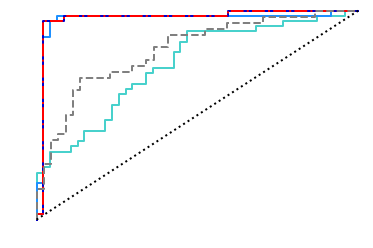

In [17]:
#image_rocs

lw = 2
fundus_results_fn='fundus_tst_results.csv'
fund_res=pd.read_table(fundus_results_fn)
fund_fpr, fund_tpr, _ = roc_curve(fund_res[['labels']].values,fund_res[['1']].values)
f_roc_auc = auc(fund_fpr, fund_tpr)
pl.plot(fund_fpr, fund_tpr, color='mediumturquoise',linestyle='-',
         lw=lw, label='Fundus model (area = %0.2f)' % f_roc_auc )


oct_xgboost_res_fn='oct_tst_results.csv'
oct_res=pd.read_table(oct_xgboost_res_fn)
oct_fpr, oct_tpr, _ = roc_curve(oct_res[['l']].values,oct_res[['preds']].values)
oct_roc_auc = auc(oct_fpr, oct_tpr)
pl.plot(oct_fpr, oct_tpr, color='dodgerblue',linestyle='-',
         lw=lw, label='OCT model (area = %0.2f)' % oct_roc_auc )



comb_res_fn='fundus_oct_ens_tst_results.csv'
comb_res=pd.read_table(comb_res_fn)
comb_fpr, comb_tpr, _ = roc_curve(comb_res[['l']].values,comb_res[['preds']].values)
comb_roc_auc = auc(comb_fpr, comb_tpr)
pl.plot(comb_fpr, comb_tpr, color='mediumblue',linestyle='-',
         lw=lw, label='Combined oct,fundus (area = %0.2f)' % comb_roc_auc)



final_comb_res_fn='bm3_fundus_oct_tst_results.csv'
f_comb_res=pd.read_table(comb_res_fn)

f_comb_fpr, f_comb_tpr, _ = roc_curve(f_comb_res[['l']].values,f_comb_res[['preds']].values)
comb_roc_auc = auc(f_comb_fpr, f_comb_tpr)


pl.plot(f_comb_fpr, f_comb_tpr, color='red',linestyle='-.',
         lw=lw, label='base model 1(area = %0.2f)' % roc_auc)

te_data1=pd.read_table('bm_te_base_1_results.csv')
bmfpr, bmtpr, _ = roc_curve(te_data1['l'].values,te_data1['pred'].values)
roc_auc = auc(bmfpr, bmtpr)

pl.plot(bmfpr, bmtpr, color='grey',linestyle='--',
         lw=lw, label='base model 1(area = %0.2f)' % roc_auc)


pl.plot([0, 1], [0, 1], color='black', lw=lw, linestyle=':')
pl.xlim([-0.02, 1.02])
pl.ylim([-0.02, 1.02])

plt.axis('off')
pl.savefig('img_roc.pdf')

In [13]:
from auc_conf import get_auc_roc
import pandas as pd
print('OCT')
oct_xgboost_res_fn='oct_tst_results.csv'
oct_res=pd.read_table(oct_xgboost_res_fn)
oct_res.head()
oct_lcf,oct_hcf = get_auc_roc(oct_res[['l']].values,oct_res[['preds']].values)

print('FUNDUS')
fundus_results_fn='fundus_tst_results.csv'
fund_res=pd.read_table(fundus_results_fn)

fundus_lcf, fundus_hcf= get_auc_roc(fund_res[['labels']].values,fund_res[['1']].values)

print('OCT_fund')
comb_res_fn='fundus_oct_ens_tst_results.csv'
comb_res=pd.read_table(comb_res_fn)
jw_lc, jw_hcf = get_auc_roc(comb_res[['l']].values,comb_res[['preds']].values)

print('oct_fund_bm3')
comb_res_fn='bm3_fundus_oct_tst_results.csv'
comb_res=pd.read_table(comb_res_fn)
jw_lc, jw_hcf = get_auc_roc(comb_res[['l']].values,comb_res[['preds']].values)

OCT
Original ROC area: 0.957
Confidence interval for the score: [0.895 - 1.0]
FUNDUS
Original ROC area: 0.742
Confidence interval for the score: [0.635 - 0.842]
OCT_fund
Original ROC area: 0.963
Confidence interval for the score: [0.907 - 1.0]
oct_fund_bm3
Original ROC area: 0.969
Confidence interval for the score: [0.926 - 0.997]


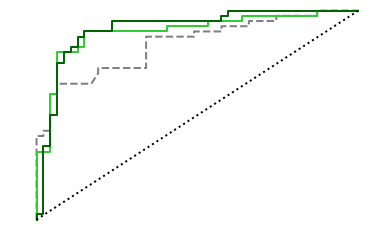

In [11]:
from plot_helper import *
import pandas as pd
import matplotlib.pylab as pl
te_data1=pd.read_table('bm_te_base_1_results.csv')
te_data2=pd.read_table('bm_te_base_2_results.csv')
te_data3=pd.read_table('bm_te_base_3_results.csv')

fpr, tpr, _ = roc_curve(te_data1['label'].values,te_data1['pred'].values)
roc_auc = auc(fpr, tpr)
lw = 2
pl.plot(fpr, tpr, color='grey',linestyle='--',
         lw=lw, label='base model 1(area = %0.2f)' % roc_auc)

fpr, tpr, _ = roc_curve(te_data2['label'].values,te_data2['pred'].values)
roc_auc = auc(fpr, tpr)

pl.plot(fpr, tpr, color='limegreen',
         lw=lw, label='base model 2(area = %0.2f)' % roc_auc)

fpr, tpr, _ = roc_curve(te_data3['label'].values,te_data3['pred'].values)
roc_auc = auc(fpr, tpr)

pl.plot(fpr, tpr, color='darkgreen',
         lw=lw, label='base model 3(area = %0.2f)' % roc_auc)

pl.plot([0, 1], [0, 1], color='black', lw=lw, linestyle=':')
pl.xlim([-0.02, 1.02])
pl.ylim([-0.02, 1.02])
#pl.xlabel('False Positive Rate')
#pl.ylabel('True Positive Rate')
#pl.title('ROC curve')
#pl.legend(loc="lower right")
#pl.legend(loc='upper center',bbox_to_anchor=(0.10,-0.05),ncol=1,frameon=False,borderpad=1.5)
plt.axis('off')
plt.savefig('bm_roc_w.pdf')